# Homework 2: Identifying Illegal Coffee Plantations

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 3rd, 11:59pm Kigali time.


**Team member 1:** Sharon Jepkorir Sawe

**Team member 2:** Rozi Mlay Hieromini

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
import matplotlib
import matplotlib.pylab as plt
from google.colab import files

# Loading Competition Data
Run all the steps below to obtain the data

In [ ]:
# Read training data images
X = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_train.txt') # read in the data as a DataFrame
X.shape # show the shape of the dataset

(1440, 400)

In [ ]:
# Read training data labels
y = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/y_train.txt')
y.shape # show the shape of the labels

(1440,)

# Now we are done with downloading data! 
* Try building a model inside this notebook by create additional cells below with code to specify and fit the model
* If you are fitting large neural nets, make sure this google colab notebook is running on GPUs
* Check Edit --> Notebook settings --> Hardware accelerator: GPU

In [ ]:
import imblearn
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
#print(imblearn.__version__)
counter = Counter(y)
print(counter)

Counter({0.0: 960, 1.0: 480})


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


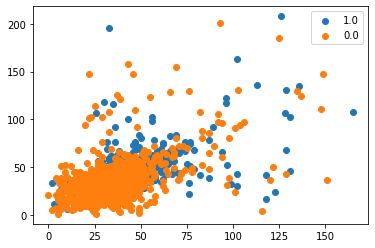

In [ ]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
# Balancing the classes using SMOTE technique

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Reshape the X's to have the correct dimensionality
X = X.reshape(X.shape[0], 20, 20)
print(X.shape)

(1920, 20, 20)


In [ ]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print('Xtrain shape',X_train.shape)
print('ytrain shape',y_train.shape)
print('Xtest shape',X_test.shape)
print('Xtest shape',X_test.shape)

Xtrain shape (1286, 20, 20)
ytrain shape (1286,)
Xtest shape (634, 20, 20)
Xtest shape (634, 20, 20)


In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1.0: 960, 0.0: 960})


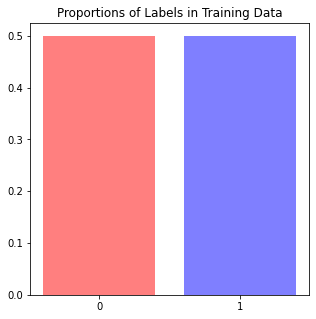

In [ ]:
# Make a bar chart showing the proportions of 0 labels and 1 labels in the training set
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Percentage of training data labeled 0
percent_0 = len(y_train[y_train == 0]) * 1. / len(y_train)
# Percentage of training data labeled 1
percent_1 = len(y_train[y_train == 1]) * 1. / len(y_train)
# Plot percentages in a bar plot
ax.bar((0, 1), (percent_0, percent_1), color=['red', 'blue'], alpha=0.5, align='center')
# Prettify the plot
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

In [ ]:
# Construct a Convolutional Neural Network

# Step 1: Set the stride size
stride_size = (2, 2)

# Step 2: Set the pool size
pool_size = (2, 2)

# Step 3: define a sequential object
cnn_model = Sequential()

# Step 4: add a convolutional layer 
cnn_model.add(
    Conv2D(100, kernel_size=3, padding='same', activation='relu',
           input_shape=(X_train.shape[-2], X_train.shape[-1], 1),
))
## Adding more convolutional layers
cnn_model.add(
    Conv2D(115, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(
    Conv2D(125, kernel_size=3, padding='same', activation='relu'))
cnn_model.add(
    Conv2D(135, kernel_size=3, padding='same', activation='relu'))
# cnn_model.add(
#     Conv2D(140, kernel_size=3, padding='same', activation='relu'))
# cnn_model.add(
#     Conv2D(145, kernel_size=3, padding='same', activation='relu'))

# Step 5: add a max pooling layer
cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))

# Addding more max pooling layers
cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))
# cnn_model.add(MaxPooling2D(pool_size=pool_size, strides=stride_size))

# Step 6: flatten
cnn_model.add(Flatten())

# Step 7: add a dense layer
cnn_model.add(Dense(10, activation='tanh'))

# Step 8: use sigmoid activation to output a probability
cnn_model.add(Dense(1, activation='sigmoid'))

# Step 8: select the learning rate
lr = 0.01

# Step 10: Compile model 
cnn_model.compile(optimizer=SGD(lr=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# X_train = X_train.reshape(-1,20, 20, 1)
# x_test = x_test.reshape(-1,28, 28, 1)

In [ ]:
# #X_train=X_train.reshape([-1,1286, 400,1])
# X_train = X_train.reshape(1286, 400,1)
# print(X_train.shape)

In [ ]:
# # Reweighing the classes
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)

In [ ]:


# class_weights

In [ ]:
# Fit the model
history = cnn_model.fit(np.expand_dims(X_train, axis=-1), y_train,batch_size=200, epochs=150, verbose=0)

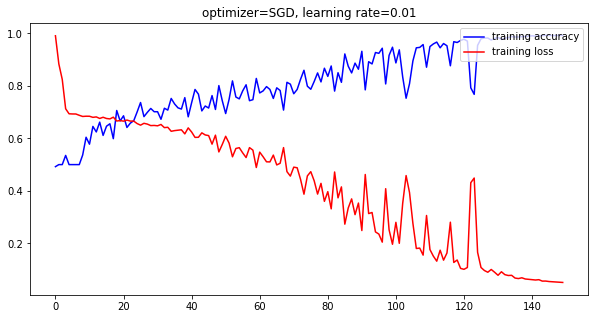

In [ ]:
# Plot the loss function and the evaluation metric over the course of training
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.array(history.history['accuracy']), color='blue', label='training accuracy')
ax.plot(np.array(history.history['loss']), color='red', label='training loss')
ax.set_title('optimizer={}, learning rate={}'.format('SGD', lr))
ax.legend(loc='upper right')
plt.show()

In [ ]:



# Step 1: make prediction on test data
y_pred = cnn_model.predict(np.expand_dims(X_test, axis=-1))

# Step 2: threthold the output probabilities
y_pred = (y_pred >= 0.5) * 1.0


# Step 3: print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[292  25]
 [ 35 282]]


In [ ]:
#(140+141)/(140+175+20+141)

In [ ]:
accuracy_score(y_test, y_pred)

0.9053627760252366

### Evaluate your predictions using the macro-F1 score

In [ ]:
f1_score(y_test, y_pred, average='macro')

0.9053392259913999

# Use your model to predict on the test data, create a submission file
Your submission file should follow the Kaggle submission template.


In [ ]:
# Read training data images
X_holdout = pd.read_csv('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_test_df.csv') # read in the data as a DataFrame
X_holdout.shape # show the shape of the dataset

(476, 401)

In [ ]:
X_holdout = X_holdout.values[:, 1:]

# Reshape the X's to have the correct dimensionality
X_holdout = X_holdout.reshape(X_holdout.shape[0], 20, 20)
print(X_holdout.shape)

(476, 20, 20)


In [ ]:
# Save your predictions to a DataFrame
my_predictions = cnn_model.predict(np.expand_dims(X_holdout, axis=-1))
# Step 2: threthold the output probabilities
my_predictions = (my_predictions >= 0.5) * 1.0


my_submission = pd.DataFrame(np.arange(len(my_predictions)), columns=['index'])
my_submission['label'] = my_predictions.astype(int)

# Save submission file
my_submission.to_csv('my_submission.csv', index=None)

# Save and download the submission file and upload to the Kaggle website

Then download `my_submission.csv` by running the following line and submit to the [Kaggle](https://www.kaggle.com/t/b9bc778c9e8842d28c5526f578e6c348) compeition website.

In [ ]:
files.download('my_submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>